In [1]:
from bed_reader import open_bed
shared_bed = open_bed('merging_habiba_hgdp/final_shared.bed').read()
shared_bed.shape

(1221, 469113)

In [ ]:
from sklearn.impute import SimpleImputer

imputed_bed = SimpleImputer(strategy='median').fit_transform(shared_bed)

In [ ]:
import pandas as pd
pops_hgdp = pd.read_csv('pops.csv')
pops_hgdp

In [ ]:
habiba_fam = pd.read_csv('flipped_shared_habiba.fam', sep='\s+', 
                         names=['FID', 'ID', 'IIDf', 'IIDm', 'sex', 'pheno'])
habiba_fam

In [ ]:
imputed_bed

In [5]:
n_habiba = imputed_bed.shape[0] - pops_hgdp.shape[0]
pops_habiba = pd.DataFrame({
    'ID': habiba_fam['ID'],
    'Sex': ['M' if s == 1 else 'F' for s in habiba_fam['sex']],
    'population': ['UAE']*n_habiba,
    'geographic_origin': ['UAE']*n_habiba,
    'region': ['UAE']*n_habiba,
    'pop_group': ['UAE']*n_habiba
})
pops_habiba

,ID,Sex,population,geographic_origin,region,pop_group
0,23,F,UAE,UAE,UAE,UAE
1,24,F,UAE,UAE,UAE,UAE
2,45,F,UAE,UAE,UAE,UAE
3,137,M,UAE,UAE,UAE,UAE
4,98,M,UAE,UAE,UAE,UAE
...,...,...,...,...,...,...
173,18,F,UAE,UAE,UAE,UAE
174,131,M,UAE,UAE,UAE,UAE
175,132,M,UAE,UAE,UAE,UAE
176,250,F,UAE,UAE,UAE,UAE


In [6]:
pops = pops_habiba.append(pops_hgdp)
pops

,ID,Sex,population,geographic_origin,region,pop_group
0,23,F,UAE,UAE,UAE,UAE
1,24,F,UAE,UAE,UAE,UAE
2,45,F,UAE,UAE,UAE,UAE
3,137,M,UAE,UAE,UAE,UAE
4,98,M,UAE,UAE,UAE,UAE
...,...,...,...,...,...,...
1038,HGDP00953,M,Yakut,Siberia,Asia,Est_Asia
1039,HGDP01070,F,Sardinian,Italy,Europe,Europe
1040,HGDP01376,M,French_Basque,France,Europe,Europe
1041,HGDP00671,M,Sardinian,Italy,Europe,Europe


In [7]:
relatedness_habiba = pd.read_csv('shared_habiba.genome', sep='\s+')
relatedness_habiba

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
0,1,23,1,24,FS,0.500,0.2825,0.4970,0.2205,0.4690,1,0.824465,1.0000,8.7930
1,1,23,1,45,OT,0.000,1.0000,0.0000,0.0000,0.0000,1,0.702391,0.1046,1.9244
2,1,23,1,137,OT,0.000,0.8703,0.1272,0.0025,0.0661,0,0.718861,1.0000,2.4152
3,1,23,1,98,OT,0.125,0.7808,0.1580,0.0613,0.1403,1,0.739675,1.0000,2.7457
4,1,23,1,96,OT,0.125,0.7639,0.1993,0.0368,0.1364,0,0.737015,1.0000,2.7975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,1,131,1,250,OT,0.000,1.0000,0.0000,0.0000,0.0000,1,0.700678,0.0000,1.5777
15749,1,131,1,247,OT,0.000,1.0000,0.0000,0.0000,0.0000,0,0.699471,0.0024,1.8346
15750,1,132,1,250,PO,0.500,0.0079,0.8848,0.1073,0.5497,1,0.834055,1.0000,141.1333
15751,1,132,1,247,PO,0.500,0.0026,0.9553,0.0421,0.5197,0,0.822583,1.0000,431.7000


(array([1945., 8067., 3480.,  892.,  729.,  101.,  159.,  244.,  122.,
          14.]),
 array([0.681919 , 0.7019425, 0.721966 , 0.7419895, 0.762013 , 0.7820365,
        0.80206  , 0.8220835, 0.842107 , 0.8621305, 0.882154 ]),
 <BarContainer object of 10 artists>)

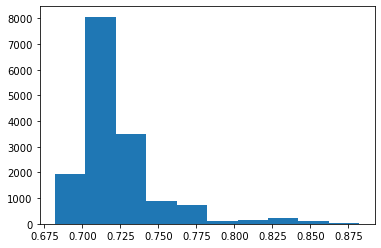

In [8]:
import matplotlib.pyplot as plt
plt.hist(relatedness_habiba['DST'])

In [9]:
from sklearn.decomposition import PCA

PCs = PCA().fit_transform(imputed_bed)

<AxesSubplot:>

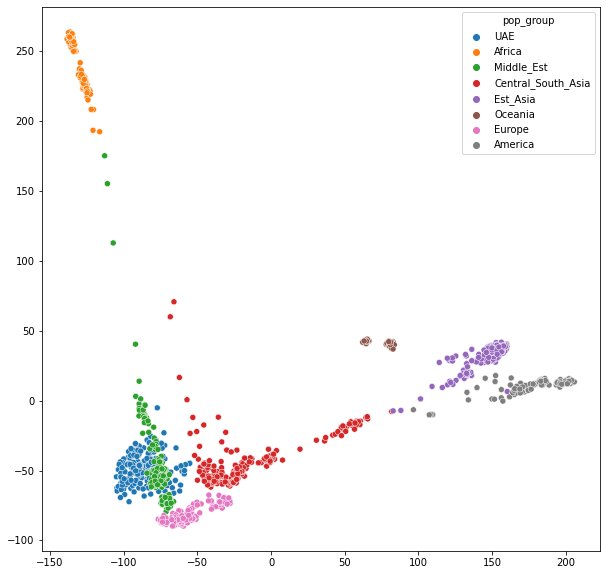

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=PCs[:, 0], y=PCs[:, 1], hue=pops['pop_group'])

In [11]:
from phate import PHATE

PHATEs = PHATE().fit_transform(imputed_bed)

Calculating PHATE...
  Running PHATE on 1221 observations and 469113 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 61.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.34 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 61.57 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 0.91 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.16 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.58 seconds.
Calculated PHATE in 65.24 seconds.


<AxesSubplot:>

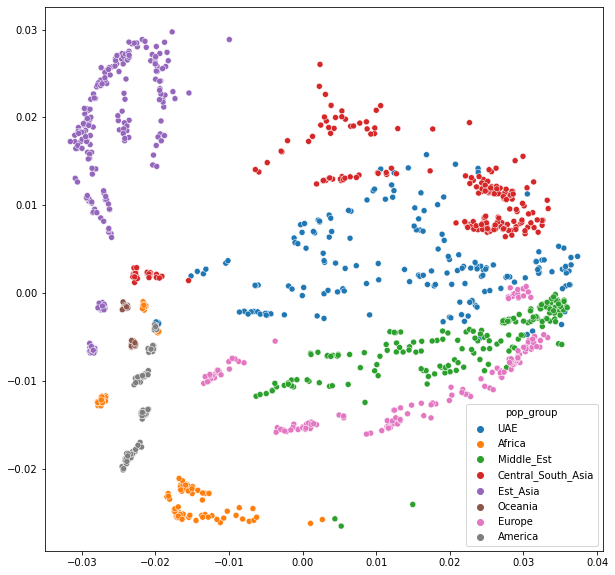

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=PHATEs[:, 0], y=PHATEs[:, 1], hue=pops['pop_group'])

In [13]:
from umap import UMAP

UMAPs = UMAP().fit_transform(imputed_bed)

/home/shussain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<AxesSubplot:>

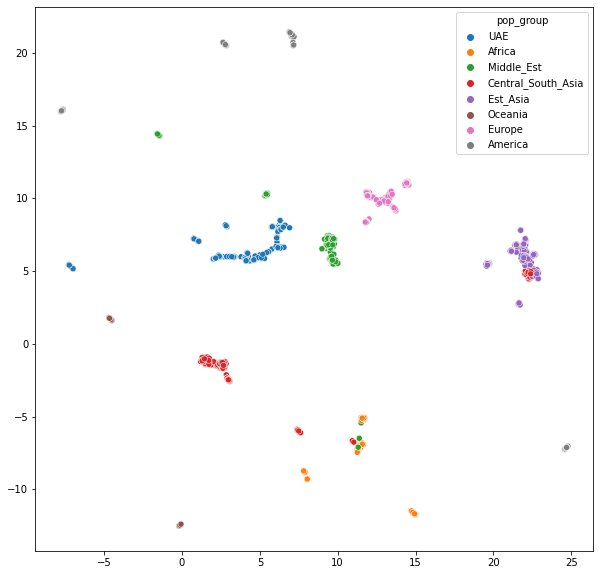

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=UMAPs[:, 0], y=UMAPs[:, 1], hue=pops['pop_group'])

In [15]:
from sklearn.manifold import TSNE

TSNEs = TSNE(n_jobs=10).fit_transform(imputed_bed)

<AxesSubplot:>

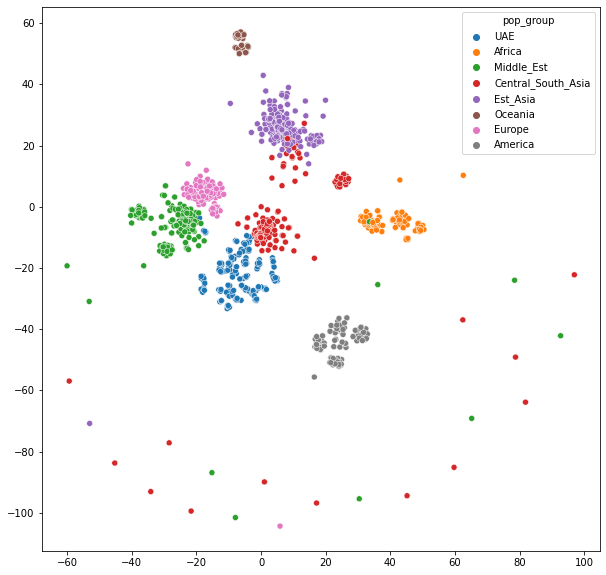

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=TSNEs[:, 0], y=TSNEs[:, 1], hue=pops['pop_group'])